### A MNIST-like fashion product database

In this, we classify the images into respective classes given in the dataset. We use a Neural Net and a Deep Neural Net in Keras to solve this and check the accuracy scores.

### Load tensorflow

In [0]:
import tensorflow as tf
tf.set_random_seed(42)

In [94]:
tf.__version__

'1.15.0'

### Collect Data

In [0]:
import keras

In [0]:
(trainX, trainY), (testX, testY) = keras.datasets.fashion_mnist.load_data()

In [97]:
print(testY[0:5])

[9 2 1 1 6]


### Convert both training and testing labels into one-hot vectors.

**Hint:** check **tf.keras.utils.to_categorical()**

In [0]:
trainY = tf.keras.utils.to_categorical(trainY)
testY = tf.keras.utils.to_categorical(testY)

In [99]:
print(trainY.shape)
print('First 5 examples now are: ', trainY[0:5])

(60000, 10)
('First 5 examples now are: ', array([[0., 0., 0., 0., 0., 0., 0., 0., 0., 1.],
       [1., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
       [1., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 1., 0., 0., 0., 0., 0., 0.],
       [1., 0., 0., 0., 0., 0., 0., 0., 0., 0.]], dtype=float32))


### Visualize the data

Plot first 10 images in the triaining set and their labels.

In [100]:
print('Train: X=%s, y=%s' % (trainX.shape, trainY.shape))
print('Test: X=%s, y=%s' % (testX.shape, testY.shape))

Train: X=(60000, 28, 28), y=(60000, 10)
Test: X=(10000, 28, 28), y=(10000, 10)


Plot of first 10 images in the training set:


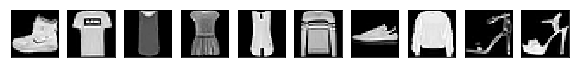

label for each of the above image:
9 0 0 3 0 2 7 2 5 5


In [101]:
import matplotlib.pyplot as plt
import numpy as np
trainLabels = np.argmax(trainY, axis=1)
print('Plot of first 10 images in the training set:')
plt.figure(figsize=(10,1))
for i in range(10):
    plt.subplot(1,10,i+1)
    plt.xticks([])
    plt.yticks([])
    plt.grid(False)
    plt.imshow(trainX[i], cmap=plt.cm.gray)
plt.show()
print('label for each of the above image:')
for i in range(10):
  print(trainLabels[i]),

### Build a neural Network with a cross entropy loss function and sgd optimizer in Keras. The output layer with 10 neurons as we have 10 classes.

In [0]:
# Initialize Sequential model
model1 = tf.keras.models.Sequential()

# Reshape data from 2D to 1D -> 28x28 to 784
model1.add(tf.keras.layers.Reshape((784,),input_shape=(28,28,)))

# Add Dense Layer which provides 10 Outputs after applying softmax
model1.add(tf.keras.layers.Dense(10, activation='softmax'))

# Comile the model
model1.compile(optimizer='sgd', loss='categorical_crossentropy', metrics=['accuracy'])

### Execute the model using model.fit()

In [103]:
sig_history = model1.fit(trainX, trainY, validation_data=(testX, testY), epochs=50)

Train on 60000 samples, validate on 10000 samples
Epoch 1/50
60000/60000 [==============================] - 3s 46us/sample - loss: 2059.2209 - acc: 0.7405 - val_loss: 1026.8799 - val_acc: 0.8037
Epoch 2/50
60000/60000 [==============================] - 3s 42us/sample - loss: 1650.5122 - acc: 0.7772 - val_loss: 1909.4084 - val_acc: 0.7171
Epoch 3/50
60000/60000 [==============================] - 3s 42us/sample - loss: 1555.1848 - acc: 0.7848 - val_loss: 1419.9596 - val_acc: 0.7687
Epoch 4/50
60000/60000 [==============================] - 3s 42us/sample - loss: 1562.5590 - acc: 0.7888 - val_loss: 4419.5823 - val_acc: 0.6549
Epoch 5/50
60000/60000 [==============================] - 3s 43us/sample - loss: 1475.9259 - acc: 0.7943 - val_loss: 2551.8195 - val_acc: 0.7395
Epoch 6/50
60000/60000 [==============================] - 3s 42us/sample - loss: 1515.2784 - acc: 0.7936 - val_loss: 1328.8214 - val_acc: 0.7923
Epoch 7/50
60000/60000 [==============================] - 3s 42us/sample - loss:

### In the above Neural Network model add Batch Normalization layer after the input layer and repeat the steps.

In [0]:
# Initialize Sequential model
model2 = tf.keras.models.Sequential()

# Reshape data from 2D to 1D -> 28x28 to 784
model2.add(tf.keras.layers.Reshape((784,),input_shape=(28,28,)))

# Normalize the data
model2.add(tf.keras.layers.BatchNormalization())

# Add Dense Layer which provides 10 Outputs after applying softmax
model2.add(tf.keras.layers.Dense(10, activation='softmax'))

# Comile the model
model2.compile(optimizer='sgd', loss='categorical_crossentropy', metrics=['accuracy'])

### Execute the model

In [105]:
sig_batchnorm_history = model2.fit(trainX, trainY, validation_data=(testX, testY), epochs=50)

Train on 60000 samples, validate on 10000 samples
Epoch 1/50
60000/60000 [==============================] - 4s 65us/sample - loss: 0.5996 - acc: 0.7927 - val_loss: 0.5064 - val_acc: 0.8261
Epoch 2/50
60000/60000 [==============================] - 4s 60us/sample - loss: 0.4882 - acc: 0.8321 - val_loss: 0.4980 - val_acc: 0.8329
Epoch 3/50
60000/60000 [==============================] - 3s 58us/sample - loss: 0.4679 - acc: 0.8389 - val_loss: 0.4790 - val_acc: 0.8362
Epoch 4/50
60000/60000 [==============================] - 4s 59us/sample - loss: 0.4576 - acc: 0.8433 - val_loss: 0.4759 - val_acc: 0.8363
Epoch 5/50
60000/60000 [==============================] - 3s 58us/sample - loss: 0.4472 - acc: 0.8460 - val_loss: 0.4727 - val_acc: 0.8361
Epoch 6/50
60000/60000 [==============================] - 3s 58us/sample - loss: 0.4433 - acc: 0.8467 - val_loss: 0.4837 - val_acc: 0.8388
Epoch 7/50
60000/60000 [==============================] - 4s 59us/sample - loss: 0.4372 - acc: 0.8493 - val_loss: 0.

Observations : From Batch Normalization output, it seems 
that convergence is faster and accuracy seems to be improved for the same epoch value.

Observations : To better understand the effect of batch normalization, plot of training and validation accuracy/loss for both the models can be observed and compared.

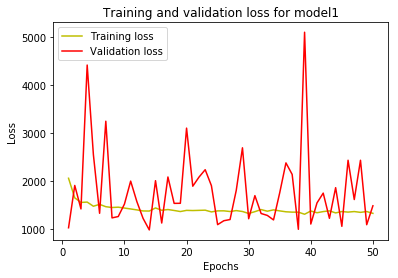

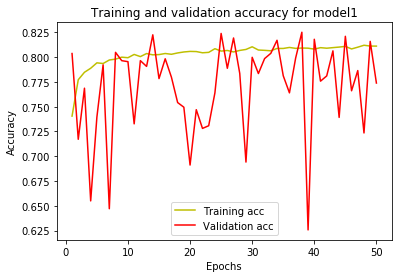

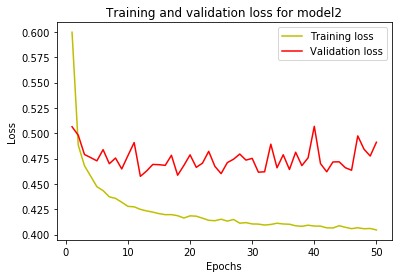

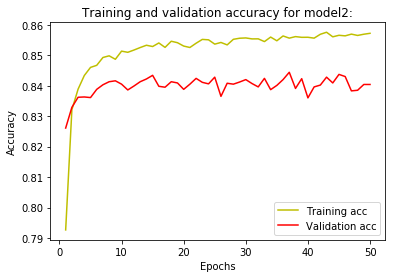

In [110]:
loss = sig_history.history['loss']
val_loss = sig_history.history['val_loss']
epochs = range(1, len(loss) + 1)
plt.plot(epochs, loss, 'y', label='Training loss')
plt.plot(epochs, val_loss, 'r', label='Validation loss')
plt.title('Training and validation loss for model1')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

acc = sig_history.history['acc']
val_acc = sig_history.history['val_acc']
plt.plot(epochs, acc, 'y', label='Training acc')
plt.plot(epochs, val_acc, 'r', label='Validation acc')
plt.title('Training and validation accuracy for model1')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

loss = sig_batchnorm_history.history['loss']
val_loss = sig_batchnorm_history.history['val_loss']
epochs = range(1, len(loss) + 1)
plt.plot(epochs, loss, 'y', label='Training loss')
plt.plot(epochs, val_loss, 'r', label='Validation loss')
plt.title('Training and validation loss for model2')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

acc = sig_batchnorm_history.history['acc']
val_acc = sig_batchnorm_history.history['val_acc']
plt.plot(epochs, acc, 'y', label='Training acc')
plt.plot(epochs, val_acc, 'r', label='Validation acc')
plt.title('Training and validation accuracy for model2:')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

Plot Observations : It can be clearly observed from the above plots that the training loss and training accuracy plots are much smoother and achieve significantly better results than the model without batch normalization.

### Customize the learning rate to 0.001 in sgd optimizer and run the model

In [0]:
# Create optimizer with non-default learning rate
sgd_optimizer = tf.keras.optimizers.SGD(lr=0.001)

In [0]:
# Compile first model
model1.compile(optimizer=sgd_optimizer, loss='categorical_crossentropy', metrics=['accuracy'])

In [113]:
model1.fit(trainX, trainY, validation_data=(testX, testY), epochs=50)

Train on 60000 samples, validate on 10000 samples
Epoch 1/50
60000/60000 [==============================] - 3s 47us/sample - loss: 589.6753 - acc: 0.8656 - val_loss: 853.9795 - val_acc: 0.8312
Epoch 2/50
60000/60000 [==============================] - 3s 43us/sample - loss: 514.5774 - acc: 0.8642 - val_loss: 773.5665 - val_acc: 0.8204
Epoch 3/50
60000/60000 [==============================] - 3s 42us/sample - loss: 476.2441 - acc: 0.8620 - val_loss: 740.8740 - val_acc: 0.8219
Epoch 4/50
60000/60000 [==============================] - 3s 43us/sample - loss: 446.6793 - acc: 0.8608 - val_loss: 693.8178 - val_acc: 0.8193
Epoch 5/50
60000/60000 [==============================] - 3s 43us/sample - loss: 423.1206 - acc: 0.8597 - val_loss: 687.5978 - val_acc: 0.8199
Epoch 6/50
60000/60000 [==============================] - 3s 43us/sample - loss: 406.6570 - acc: 0.8585 - val_loss: 661.1235 - val_acc: 0.8215
Epoch 7/50
60000/60000 [==============================] - 3s 43us/sample - loss: 389.7730 - 

In [0]:
# Compile second model
model2.compile(optimizer=sgd_optimizer, loss='categorical_crossentropy', metrics=['accuracy'])

In [115]:
model2.fit(trainX, trainY, validation_data=(testX, testY), epochs=50)

Train on 60000 samples, validate on 10000 samples
Epoch 1/50
60000/60000 [==============================] - 4s 65us/sample - loss: 0.3937 - acc: 0.8618 - val_loss: 0.4680 - val_acc: 0.8434
Epoch 2/50
60000/60000 [==============================] - 4s 59us/sample - loss: 0.3918 - acc: 0.8617 - val_loss: 0.4646 - val_acc: 0.8432
Epoch 3/50
60000/60000 [==============================] - 4s 59us/sample - loss: 0.3924 - acc: 0.8620 - val_loss: 0.4880 - val_acc: 0.8429
Epoch 4/50
60000/60000 [==============================] - 4s 59us/sample - loss: 0.3930 - acc: 0.8615 - val_loss: 0.4814 - val_acc: 0.8433
Epoch 5/50
60000/60000 [==============================] - 4s 60us/sample - loss: 0.3931 - acc: 0.8625 - val_loss: 0.4798 - val_acc: 0.8423
Epoch 6/50
60000/60000 [==============================] - 4s 59us/sample - loss: 0.3919 - acc: 0.8620 - val_loss: 0.4800 - val_acc: 0.8431
Epoch 7/50
60000/60000 [==============================] - 4s 63us/sample - loss: 0.3924 - acc: 0.8619 - val_loss: 0.

### Build the Neural Network model with 3 Dense layers with 100,100,10 neurons respectively in each layer. Use cross entropy loss function and singmoid as activation in the hidden layers and softmax as activation function in the output layer. Use sgd optimizer with learning rate 0.03.

In [0]:
# Initialize Sequential model
model3 = tf.keras.models.Sequential()

# Reshape data from 2D to 1D -> 28x28 to 784
model3.add(tf.keras.layers.Reshape((784,),input_shape=(28,28,)))

# Normalize the data
model3.add(tf.keras.layers.BatchNormalization())

In [0]:
#Add 1st hidden layer
model3.add(tf.keras.layers.Dense(100, activation='sigmoid'))

In [0]:
#Add 2nd hidden layer
model3.add(tf.keras.layers.Dense(100, activation='sigmoid'))

In [0]:
#Add OUTPUT layer
model3.add(tf.keras.layers.Dense(10, activation='softmax'))

In [0]:
# Create optimizer with non-default learning rate
sgd_optimizer = tf.keras.optimizers.SGD(lr=0.03)

# Compile the model
model3.compile(optimizer=sgd_optimizer, loss='categorical_crossentropy', metrics=['accuracy'])

## Review model

In [121]:
model1.summary()

Model: "sequential_9"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
reshape_9 (Reshape)          (None, 784)               0         
_________________________________________________________________
dense_13 (Dense)             (None, 10)                7850      
Total params: 7,850
Trainable params: 7,850
Non-trainable params: 0
_________________________________________________________________


In [122]:
model2.summary()

Model: "sequential_10"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
reshape_10 (Reshape)         (None, 784)               0         
_________________________________________________________________
batch_normalization_5 (Batch (None, 784)               3136      
_________________________________________________________________
dense_14 (Dense)             (None, 10)                7850      
Total params: 10,986
Trainable params: 9,418
Non-trainable params: 1,568
_________________________________________________________________


In [123]:
model3.summary()

Model: "sequential_11"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
reshape_11 (Reshape)         (None, 784)               0         
_________________________________________________________________
batch_normalization_6 (Batch (None, 784)               3136      
_________________________________________________________________
dense_15 (Dense)             (None, 100)               78500     
_________________________________________________________________
dense_16 (Dense)             (None, 100)               10100     
_________________________________________________________________
dense_17 (Dense)             (None, 10)                1010      
Total params: 92,746
Trainable params: 91,178
Non-trainable params: 1,568
_________________________________________________________________


### Run the model

In [124]:
model3.fit(trainX, trainY, validation_data=(testX, testY), epochs=50)

Train on 60000 samples, validate on 10000 samples
Epoch 1/50
60000/60000 [==============================] - 6s 96us/sample - loss: 1.0299 - acc: 0.6896 - val_loss: 0.6347 - val_acc: 0.7742
Epoch 2/50
60000/60000 [==============================] - 5s 88us/sample - loss: 0.5725 - acc: 0.7982 - val_loss: 0.5143 - val_acc: 0.8149
Epoch 3/50
60000/60000 [==============================] - 5s 87us/sample - loss: 0.4939 - acc: 0.8241 - val_loss: 0.4700 - val_acc: 0.8307
Epoch 4/50
60000/60000 [==============================] - 5s 90us/sample - loss: 0.4565 - acc: 0.8360 - val_loss: 0.4517 - val_acc: 0.8357
Epoch 5/50
60000/60000 [==============================] - 5s 87us/sample - loss: 0.4325 - acc: 0.8461 - val_loss: 0.4312 - val_acc: 0.8428
Epoch 6/50
60000/60000 [==============================] - 5s 86us/sample - loss: 0.4162 - acc: 0.8509 - val_loss: 0.4199 - val_acc: 0.8467
Epoch 7/50
60000/60000 [==============================] - 5s 85us/sample - loss: 0.4001 - acc: 0.8569 - val_loss: 0.

In [125]:
print('Model Evaluation on test data: ')
results = model1.evaluate(testX, testY, verbose=0)
print('Test loss, Test Accuracy : ', results)

Model Evaluation on test data: 
('Test loss, Test Accuracy : ', [400.3715799072266, 0.8053])


In [126]:
print('Model Evaluation on test data: ')
results = model2.evaluate(testX, testY, verbose=0)
print('Test loss, Test Accuracy : ', results)

Model Evaluation on test data: 
('Test loss, Test Accuracy : ', [0.484619952583313, 0.8434])


In [127]:
print('Model Evaluation on test data: ')
results = model3.evaluate(testX, testY, verbose=0)
print('Test loss, Test Accuracy : ', results)

Model Evaluation on test data: 
('Test loss, Test Accuracy : ', [0.3345583696961403, 0.8841])


Different NN models were created and observed the accuracy and convergence in each model to compare.

With BatchNormalization accuracy was observed to be improved and convergence was faster.This will be prominently visible with more complex NN models.

Although time of execution for each epoch is observed to be increased as bit.Model accuracy seems to be improved after adding hidden layers.

Model were run with varying sgd optimizer learning rate (0.01 (default), lr = 0.001 and lr = 0.03)